In [70]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import VarianceThreshold

## Read data Set

In [30]:
df = pd.read_csv("C://Users//Sudipta//Downloads//housesalesprediction//kc_house_data.csv",parse_dates= ['date'])
print("Data shape: ", hdf.shape)
df.head()

Data shape:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.3 MB


In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Remove Unnecessary columns

In [32]:
df.drop('id',axis=1,inplace=True)

## Plot hist on Target

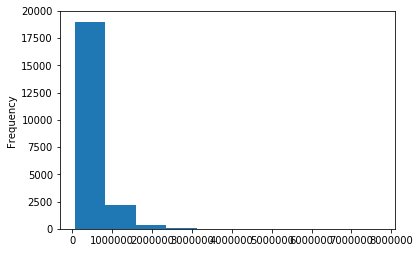

In [33]:
df['price'].plot.hist()

## Check missing values

In [34]:
  def missing_value_table(df):
        
        # Total Missing values
        miss_val = df.isnull().sum()
        
        # %age of missing values 
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Create a table
        mis_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)
        
        # Rename the columns
        mis_val_table_relnamed_col = mis_val_table.rename(columns = {0: "Missing Value", 1 : "% of total Missing Values"})
        
        # Sort the table by %age of missing values
        mis_val_table_relnamed_col = mis_val_table_relnamed_col[mis_val_table_relnamed_col.iloc[:,1] !=0].sort_values("% of total Missing Values",ascending = False).round(1)
        
        # Write Summary
        print("Selected dataframe has " + str(df.shape[1]) + " columns. There are " + str(mis_val_table_relnamed_col.shape[0]) + " columns that have missing values. ")
    
        return mis_val_table_relnamed_col
    




In [35]:
missing_value_table(df)

Selected dataframe has 20 columns. There are 0 columns that have missing values. 


,Missing Value,% of total Missing Values


In [72]:
[ col for col in df.columns if df[col].isnull().sum() > 0]

[]

## Check Column Types

In [36]:
df.dtypes.value_counts()

int64             14
float64            5
datetime64[ns]     1
dtype: int64

## Feature Scaling 

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

## Number of unique values in each column

In [37]:
df.select_dtypes(include=['int64','float64']).apply(pd.Series.nunique,axis =0).sort_values(ascending=False) 

sqft_lot         9782
sqft_lot15       8689
lat              5034
price            4028
sqft_living      1038
sqft_above        946
sqft_living15     777
long              752
sqft_basement     306
yr_built          116
zipcode            70
yr_renovated       70
bathrooms          30
bedrooms           13
grade              12
floors              6
condition           5
view                5
waterfront          2
dtype: int64

## Identify Categorial Variables for encoding

In [38]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [39]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [40]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [41]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

## Find correlation

In [42]:
correlation=df.corr()['price'].sort_values()

print("Most positive correltion: \n", correlation.tail(15))
print("Most negative correltion: \n", correlation.head(15))

Most positive correltion: 
 sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64
Most negative correltion: 
 zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
Name: price, dtype: float64


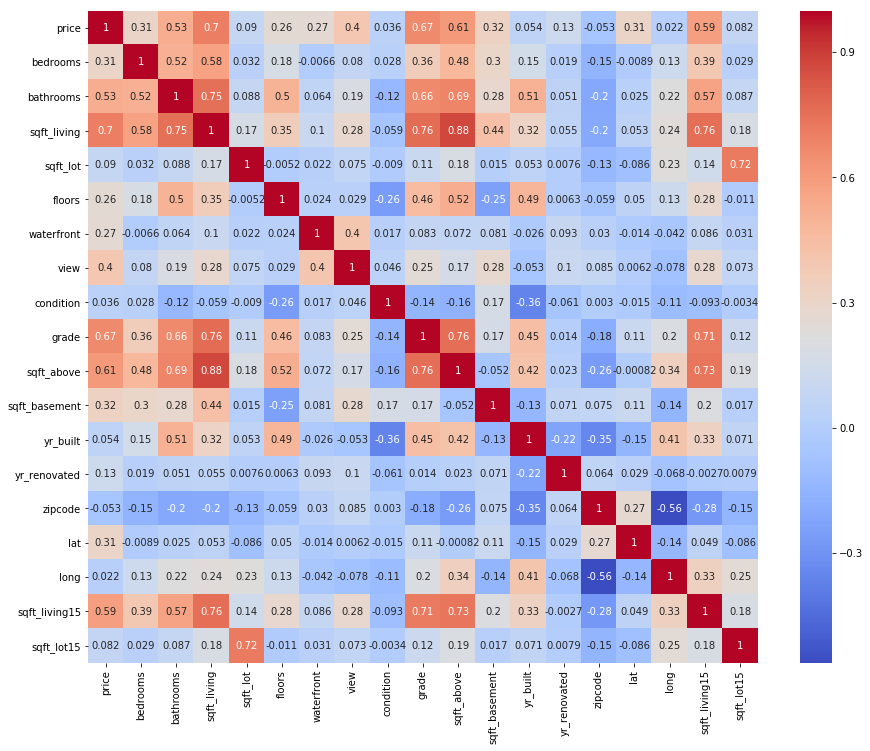

In [43]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Understanding Univariate Dataset and distplot

#### Univariate : 
    Categorical - Barchart
    Continuous - Linechart
    Interval - Histogram

In [44]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

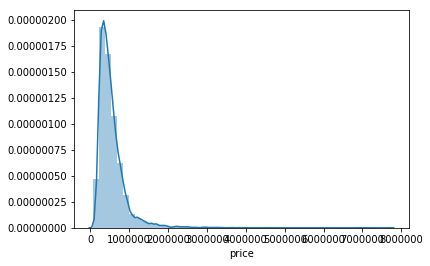

In [45]:
sns.distplot(df['price'])

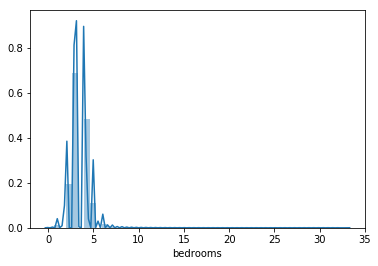

In [47]:
sns.distplot(df['bedrooms'])

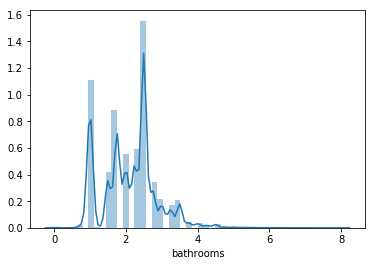

In [49]:
sns.distplot(df['bathrooms'])

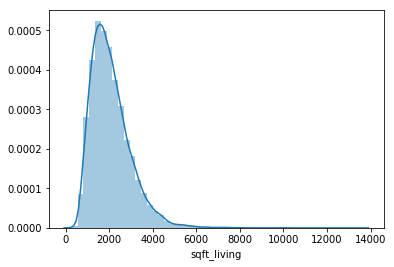

In [50]:
sns.distplot(df['sqft_living'])

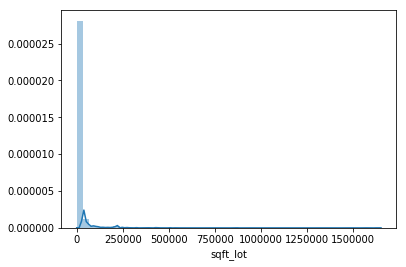

In [51]:
sns.distplot(df['sqft_lot'])

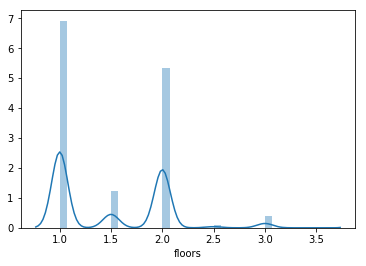

In [52]:
sns.distplot(df['floors'])

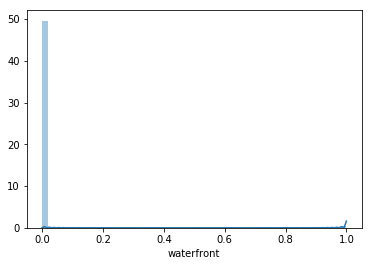

In [56]:
sns.distplot(df['waterfront'])

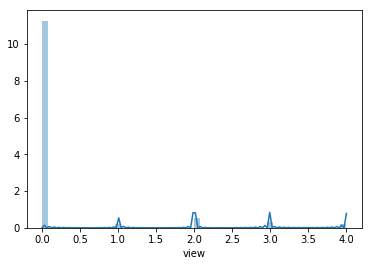

In [57]:
sns.distplot(df['view'])

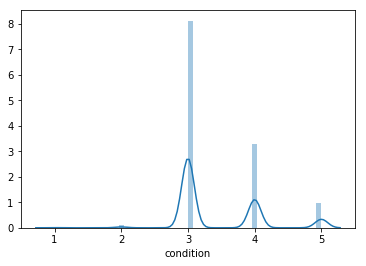

In [58]:
sns.distplot(df['condition'])

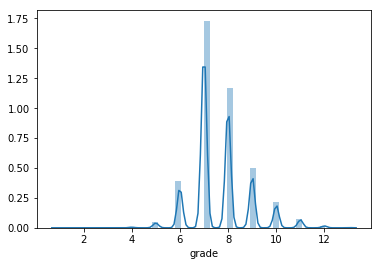

In [59]:
sns.distplot(df['grade'])

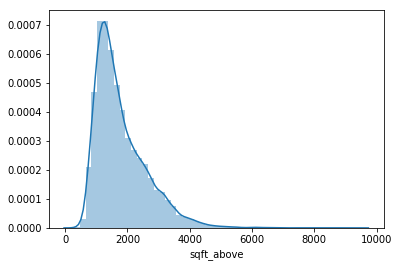

In [60]:
sns.distplot(df['sqft_above'])

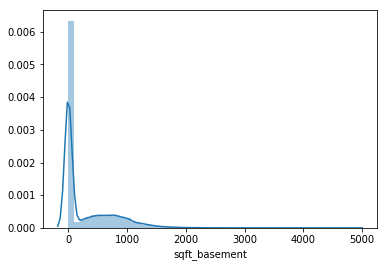

In [61]:
sns.distplot(df['sqft_basement'])

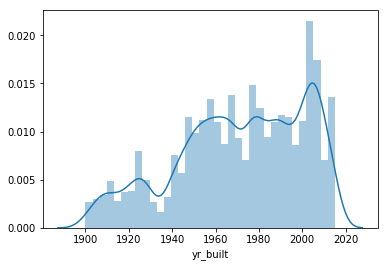

In [62]:
sns.distplot(df['yr_built'])

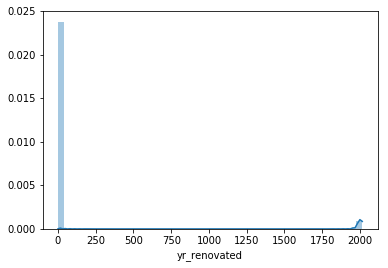

In [63]:
sns.distplot(df['yr_renovated'])

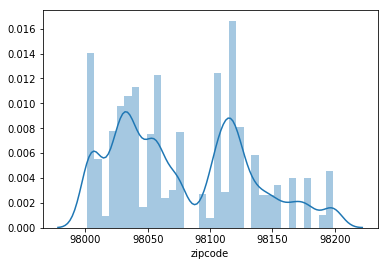

In [64]:
sns.distplot(df['zipcode'])

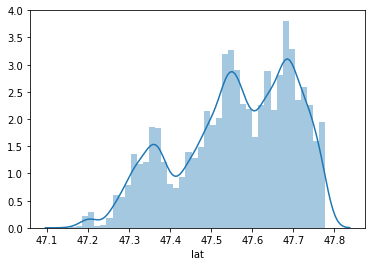

In [65]:
sns.distplot(df['lat'])

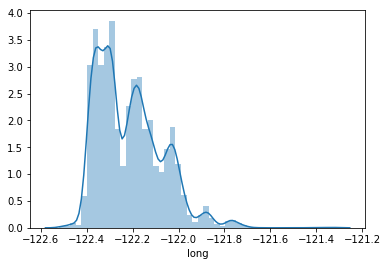

In [66]:
sns.distplot(df['long'])

## Seperate Training and Test Set

In [141]:
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(labels=['price','date'],axis = 1),
    df['price'],
    test_size=.3,
    random_state=0)

In [142]:
X_train.shape

(15129, 18)

In [143]:
y_train.shape

(15129,)

In [144]:
X_test.shape

(6484, 18)

In [145]:
y_test.shape

(6484,)

## Feature Selection

#### Find zero variance / Constant features

In [146]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [147]:
sum(sel.get_support())

18

In [148]:
 [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

[]

In [149]:
[x for x in X_train.columns if x in X_train.columns[sel.get_support()]]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

#### Check one random feature 

In [150]:

df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [151]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [152]:
set(df['grade'])

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

#### Remove the low variance features

In [137]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

#### Check for low variance features

In [153]:
sel = VarianceThreshold(threshold=.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [154]:
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['waterfront']

In [155]:
[x for x in X_train.columns if x in X_train.columns[sel.get_support()]]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [156]:
X_train['waterfront'].value_counts()/np.float(len(X_train))

0    0.991936
1    0.008064
Name: waterfront, dtype: float64

#### Find duplicated features

In [159]:
## WIll do it later

## Filter Method

In [165]:
numerics = ['int16','int32','int64','float16','float32','float64']
munerical_vars = list(df.select_dtypes(include=numerics).columns)
df = df[munerical_vars]
df.shape



(21613, 19)

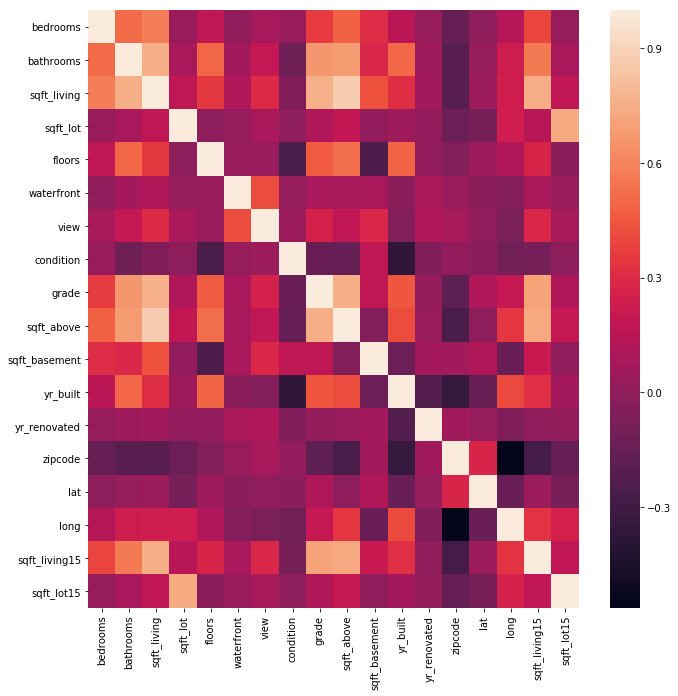

In [167]:
cormat = X_train.corr()
fig,ax = plt.subplots()
fig.set_size_inches(11,11)

sns.heatmap(cormat)


## BruteForce Approach

In [181]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [182]:
corr_features = correlation(X_train,.8)

In [185]:
corr_features

{'sqft_above'}

In [187]:
len(set(corr_features))

1

In [188]:
X_train.drop(labels=corr_features,axis = 1, inplace=True)
X_test.drop(labels=corr_features,axis = 1, inplace=True)

In [190]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
lm.score(X_train,y_train)

0.70448080674897839

In [ ]:
|